# House Price Prediction

In [54]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [77]:
# read dataset 
dataset = pd.read_csv("./dataset/data.csv" , index_col=False)

In [80]:
dataset = dataset.reset_index(drop=True)


### Show dataset info and details

In [81]:
dataset.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [58]:
dataset.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Data visualization 

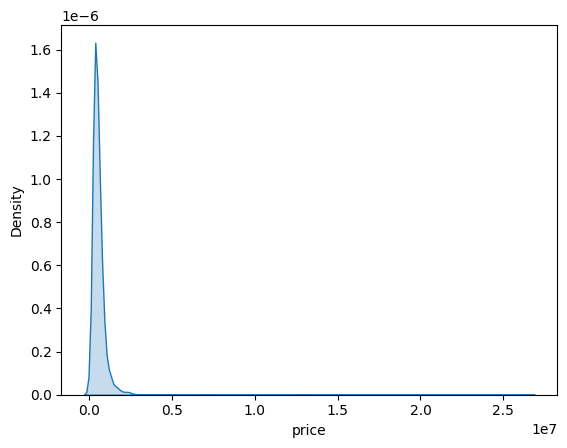

In [59]:
sns.kdeplot(data=dataset,x="price" , fill=True)
plt.show()

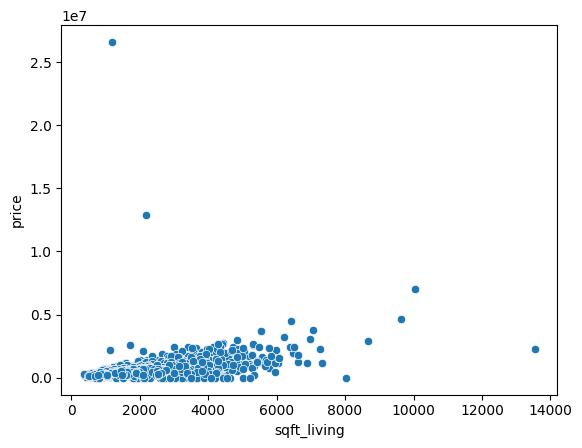

In [60]:
sns.scatterplot(data=dataset, x="sqft_living", y="price")
plt.show()

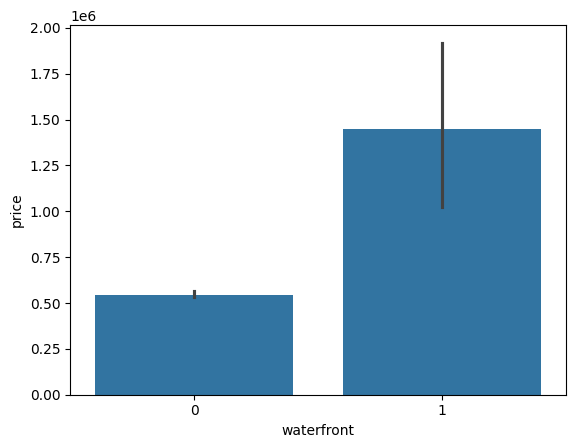

In [61]:
sns.barplot(data=dataset, x="waterfront", y="price")
plt.show()

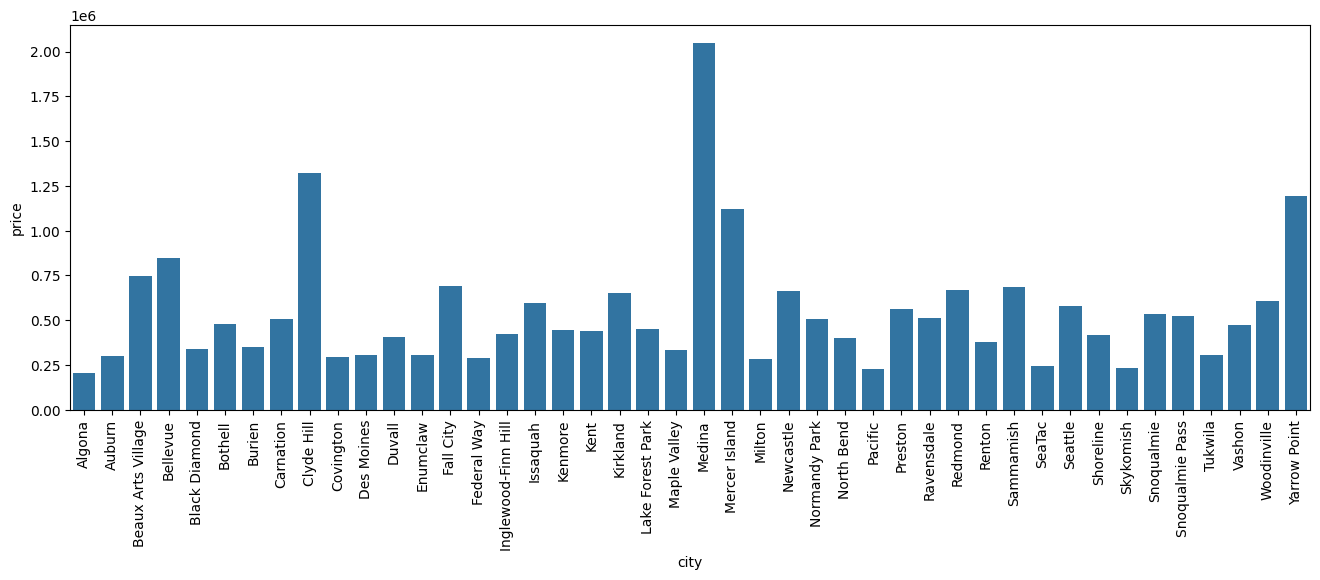

In [62]:
city_price = dataset.groupby("city")["price"].mean().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(data=city_price, x="city", y="price")
plt.xticks(rotation=90)
plt.show()


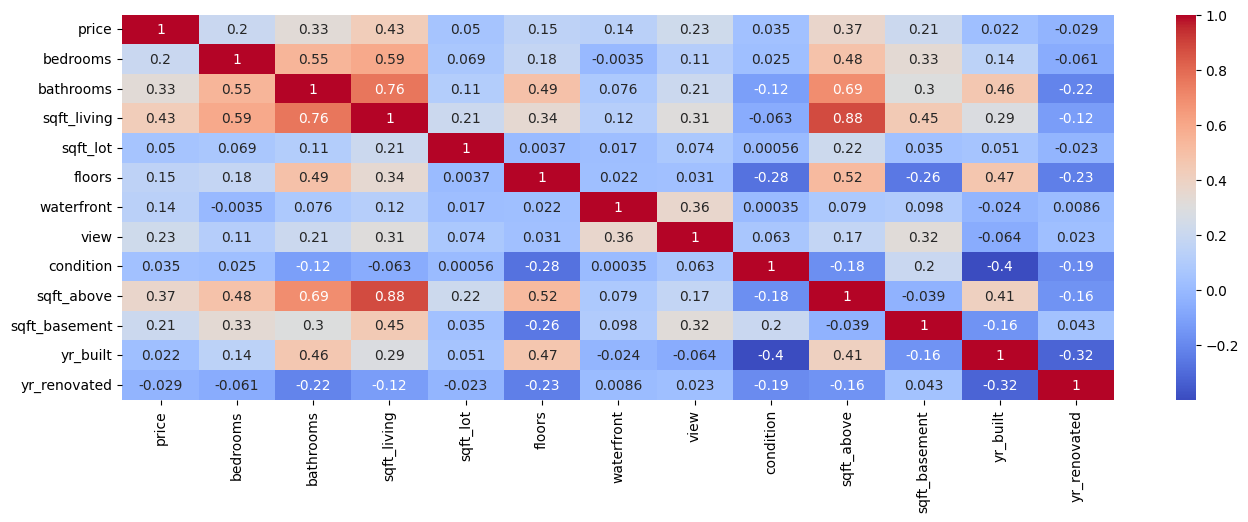

In [63]:
corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(16,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


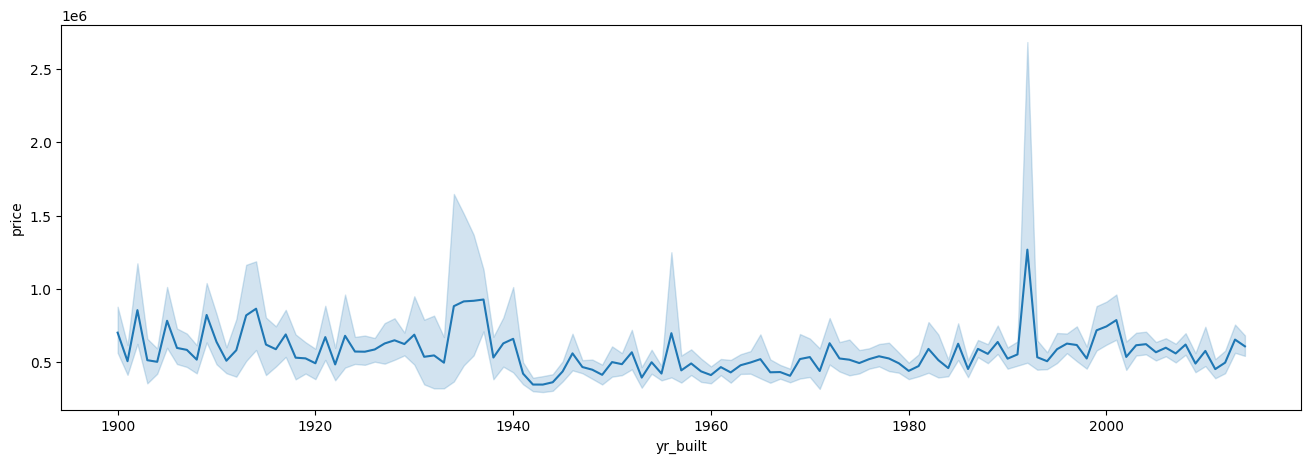

In [64]:
plt.figure(figsize=(16,5))
sns.lineplot(data=dataset, x="yr_built", y="price")
plt.show()


### Modify the location name or replace the location name with number

In [65]:
# make a function that replace the place name with number
city_map = {city:idx for idx,city in enumerate(dataset["city"].unique()) }
dataset["city"]= dataset["city"].map(city_map)

In [66]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,0,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,1,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,2,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,4,WA 98052,USA


In [67]:
# divides data
X = dataset.drop(columns=["price","country","street","statezip","date"])
Y = dataset["price"]

In [68]:
print(X)
print(Y)

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          3.0       1.50         1340      7912     1.5           0     0   
1          5.0       2.50         3650      9050     2.0           0     4   
2          3.0       2.00         1930     11947     1.0           0     0   
3          3.0       2.25         2000      8030     1.0           0     0   
4          4.0       2.50         1940     10500     1.0           0     0   
...        ...        ...          ...       ...     ...         ...   ...   
4595       3.0       1.75         1510      6360     1.0           0     0   
4596       3.0       2.50         1460      7573     2.0           0     0   
4597       3.0       2.50         3010      7014     2.0           0     0   
4598       4.0       2.00         2090      6630     1.0           0     0   
4599       3.0       2.50         1490      8102     2.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renova

## SPLIT DATASET INTO TRAIN AND TEST

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y ,train_size=0.2 ,random_state=42)

In [102]:

print(X_train.head())
print(Y_train.head())

      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1828       3.0       2.25         1450      4706     2.0           0     0   
1573       4.0       2.00         1670     12056     1.0           0     0   
319        4.0       1.75         1730      8320     1.0           0     0   
653        4.0       2.50         2240     14667     2.0           0     0   
2137       4.0       2.50         2700      5100     1.0           0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  
1828          3        1450              0      2009             0    25  
1573          3        1670              0      1955          2005    25  
319           3        1230            500      1977          2004    12  
653           4        2240              0      1989             0    26  
2137          4        1440           1260      1968             0     1  
1828    400000.0
1573    400000.0
319     258000.0
653     565000.0
2137    55000

## Train model

In [71]:
model = LinearRegression()

In [72]:
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
X_

In [73]:
# predict
X_train_predict = model.predict(X_train)

In [74]:
print(X_train_predict)

[ 2.03755736e+05  3.34378849e+05  3.12242712e+05  4.80226655e+05
  6.90482177e+05  3.24685656e+05  5.83552875e+05  3.44643665e+05
  1.24958311e+05  3.67318332e+05  7.03346120e+05  4.36574128e+05
  3.90246708e+05  1.07635588e+06  7.64216699e+04  7.30534453e+05
  5.88356833e+05  6.73505463e+05  2.44518379e+05  4.29942081e+05
  7.46411367e+05  8.97956820e+05  2.51672581e+05  4.44585055e+05
  4.60843719e+05  1.03056740e+06  1.60773497e+06  4.58498066e+05
  5.36069976e+05  4.22015003e+05  1.01782369e+06  1.14209754e+06
  3.30522514e+05  2.26123567e+05  5.55022883e+05  3.13432972e+05
  5.28786324e+05  3.04876071e+05  7.13649680e+05  3.98924288e+05
  3.82198921e+05  2.86129946e+05  5.08886772e+05  7.48005065e+05
  6.76528541e+05  7.66747462e+05  6.48429046e+05  8.03211925e+05
  6.25518751e+05  4.82489068e+05  5.30448912e+05  2.07045482e+05
  2.15180848e+05  2.28952632e+05  5.64199524e+05  6.95058555e+05
  4.86375366e+05  4.48506793e+05  4.06326219e+05  2.89016689e+05
  3.46045895e+05  2.96204

## get accuracy of train dataset and train dataset

In [103]:
Y_train = pd.array(Y_train)
train_data_accuracy_score = model.score(Y_train,X_train_predict)
print("Train data accuracy score:",train_data_accuracy_score)

/workspace/test/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.arrays.numpy_.NumpyExtensionArray'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [97]:
Y_train = pd.array(Y_train)

In [98]:
print(Y_train)

<NumpyExtensionArray>
[     313000.0,     2384000.0,      342000.0,      420000.0,      550000.0,
      490000.0,      335000.0,      482000.0,      452500.0,      640000.0,
 ...
 380680.555556, 396166.666667,      252980.0, 289373.307692, 210614.285714,
 308166.666667, 534333.333333, 416904.166667,      203400.0,      220600.0]
Length: 4600, dtype: float64
